In [58]:
# imports
import numpy as np
import pandas as pd
import hashlib
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [81]:
# connect to local elastic search host
HOST = 'http://localhost:9200/'
es = Elasticsearch(hosts=[HOST])
INDEX = 'info_clone2'
SUBJECT = 'functions'
COLOR = 'g' # 'g'################ g for me, b for rule

In [60]:
es.ping()

True

In [61]:
s = Search(using=es, index=INDEX)
q = Q("wildcard", name='*') 
#q = Q("wildcard", name='Untitled*') # get all untitled files
#q = Q("match", name='Untitled.ipynb') # get only Untitled files

In [62]:
N = 10000
query = s.query(q).extra(size=N)
response = query.execute()

In [63]:
len(response)

10000

In [43]:
# nbid = response[0].meta.id
# res = es.get(index='code', id=nbid)
# print(res['_source'])

In [82]:
total = []
for i in range(N):
    name = response[i]['name']
    nbid = response[i].meta.id
    coderes = es.get(index='code', id=nbid)
    imp = coderes['_source'][SUBJECT]
    for item in imp:
        total.append(item[0])

In [83]:
x = np.array(total)
items, counts = np.unique(total, axis=0, return_counts=True)

In [84]:
count_sort_ind = np.argsort(-counts)
i = items[count_sort_ind]
c = counts[count_sort_ind]

No handles with labels found to put in legend.


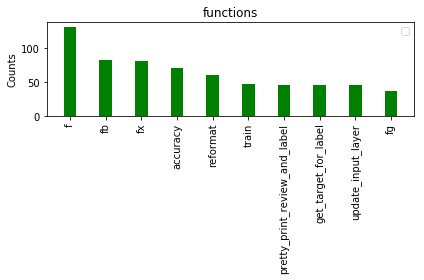

In [85]:
topN = 10
i = i[:topN]
c = c[:topN]

x = np.arange(len(i))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, c, width, color=COLOR)
ax.set_ylabel('Counts')
ax.set_title(SUBJECT)
ax.set_xticks(x)
ax.set_xticklabels(i, rotation='vertical')
ax.legend()
fig.tight_layout()
fig.savefig('figure.png')
plt.show()